```markdown
# Analysis and Modeling of Essay Scoring Data
```

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


In [8]:
df = pd.read_csv("D:\dlproject\dlproj\data\processed\processed_essays.csv", delimiter=',')  # assuming it's tab-separated


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KEVIN\AppData\Local\Temp\ipykernel_34320\2451094356.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\dlproject\dlproj\data\processed\processed_essays.csv", delimiter=',')  # assuming it's tab-separated


In [9]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   essay_id  essay_set  domain1_score  \
0         1          1              8   
1         2          1              9   
2         3          1              7   
3         4          1             10   
4         5          1              8   

                                         clean_essay  essay_length  \
0  dear local newspaper i think effects computers...      0.314850   
1  dear caps1 caps2 i believe that using computer...      0.391917   
2  dear caps1 caps2 caps3 more and more people us...      0.260338   
3  dear local newspaper caps1 i have found that m...      0.490602   
4  dear location1 i know having computers has a p...      0.435150   

   sentence_count  char_length  avg_word_length  words_per_sentence  \
0             0.0     0.303452         0.447938            0.314850   
1             0.0     0.374330         0.433798            0.391917   
2             0.0     0.251173         0.449259            0.260338   
3             0.0     0.513740         0.587558 

In [10]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [11]:
print(df.columns.tolist())


['essay_id', 'essay_set', 'domain1_score', 'clean_essay', 'essay_length', 'sentence_count', 'char_length', 'avg_word_length', 'words_per_sentence', 'chars_per_word', 'mean_score']


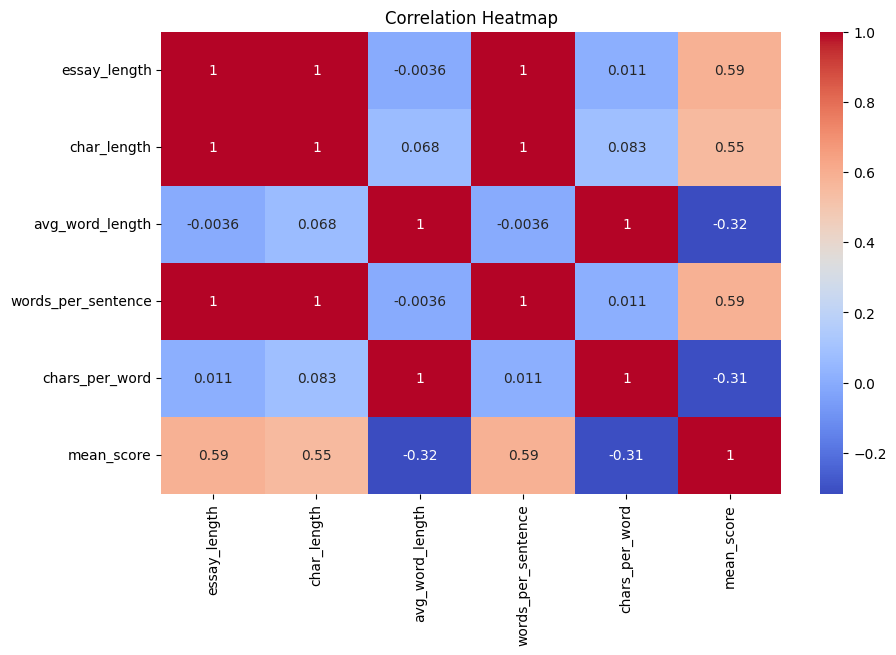

In [13]:
# Select relevant features
features = ['essay_length', 'char_length', 
            'avg_word_length', 'words_per_sentence', 'chars_per_word', 'mean_score']

# Calculate correlation matrix
corr_matrix = df[features].corr()

# Display it
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


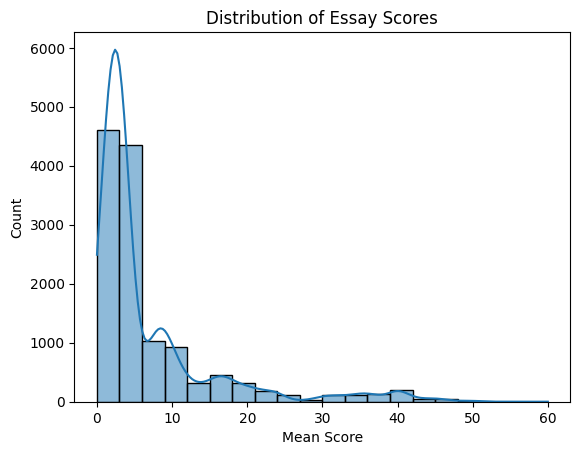

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['mean_score'], bins=20, kde=True)
plt.title('Distribution of Essay Scores')
plt.xlabel('Mean Score')
plt.ylabel('Count')
plt.show()


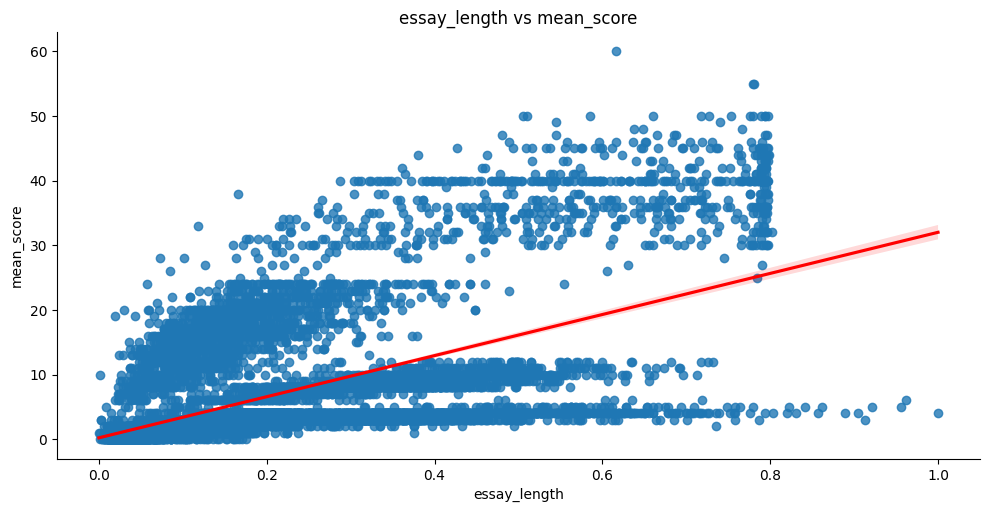

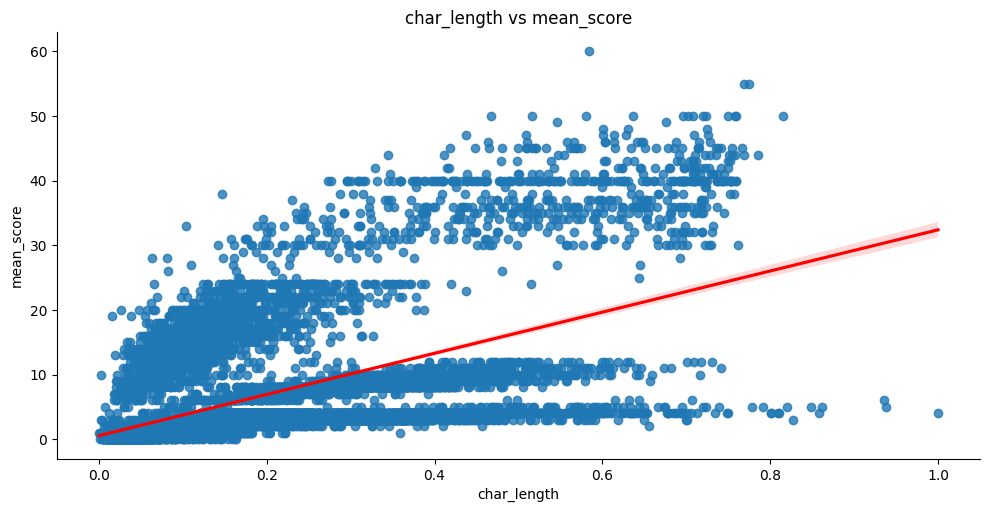

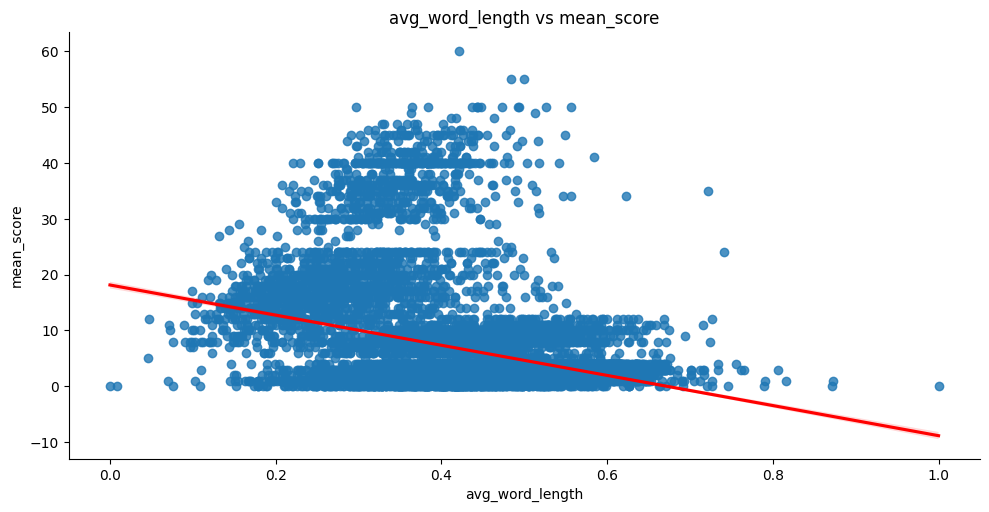

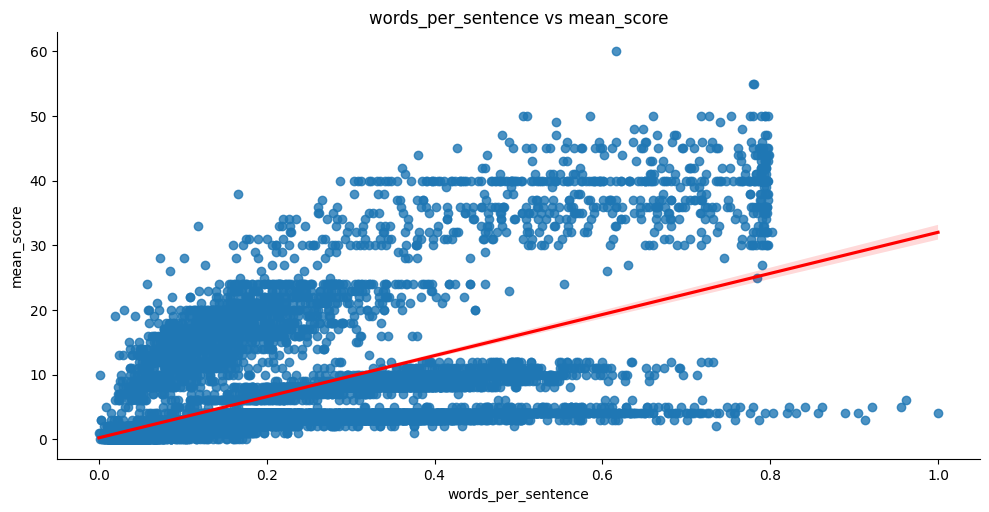

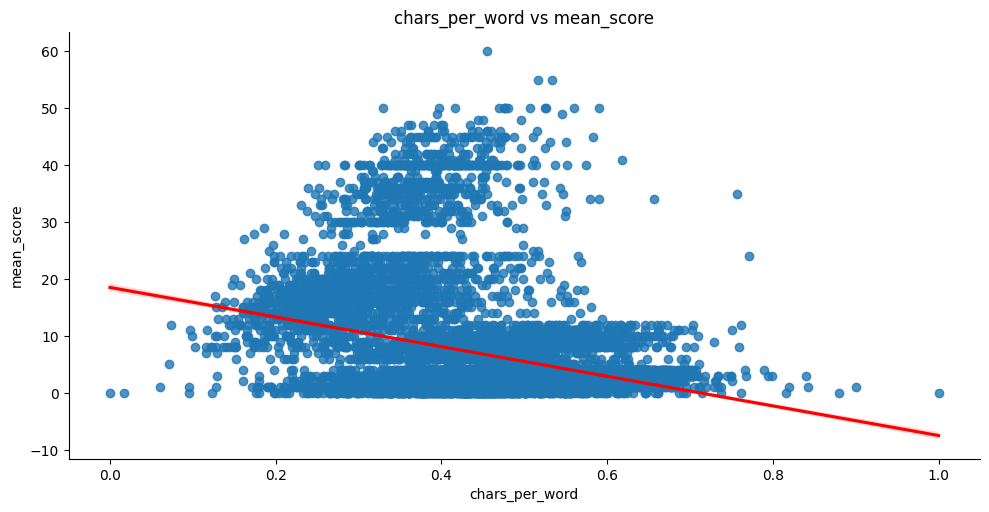

In [16]:
for col in features[:-1]:  # exclude mean_score itself
    sns.lmplot(x=col, y='mean_score', data=df, aspect=2, height=5, line_kws={'color': 'red'})
    plt.title(f'{col} vs mean_score')
    plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define X and y
X = df[['essay_length', 'sentence_count', 'char_length']]
y = df['mean_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Score
print("R2 Score:", r2_score(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coef_df)


R2 Score: 0.4764542612445658
                Coefficient
essay_length     242.396274
sentence_count     0.000000
char_length     -225.099089
